## Testing conductivity mass balance hydrograph separation 

### Pindar & Jones (1969) style conductivity mass balance (CMB) to separate old from new water.

### Testing using stream discharge and electrical conductivity (EC) data from Boise State Hydrology Earth Drycreek learning module _\#3. Calculate the Old Water and New Water Contributions to Event Flow_

#### See https://www.boisestate.edu/drycreek/educational-resources/hydrograph-separation/#project-instructions

### Data (hourly) are from the Dry Creek lower gauge (LG) from 1/1/2009 to 12/31/2009. 

### I made a csv from the Excel spreadsheet tab 1 (LG-Discharge) with just Datetime, Discharge (L/s), and EC (mS/cm). There are some missing values to deal with. 

### The other needed data is from manual measurements from grab samples of the precipitation at Dry Creek, which indicate that rainfall has an electric conductivity of **0.013 ± 0.004 mS/cm.**

### A bit more about the timeseries/exercise: 

>Note: The hydrograph is dominated by the large snowmelt event that peaks on April 21, 2009. Although several rain events occur throughout the year, Summer and early-Fall events are typically too small to produce significant discharge, Spring rains fall on the rapidly receding snowmelt runoff, and late-Fall/winter precipitation is complicated by snow. 2009, however, offered two large, relatively simple rain events causing streamflow peaks on June 15, 2009 and August 7, 2009. This exercise focuses on the August storm. The exercise can be repeated for the June storm.

#### More on the Dry Creek watershed here: https://www.boisestate.edu/drycreek/watershed-desciption/

In [1]:
setwd("/home/millieginty/Documents/git-repos/cQ_analysis/")

In [3]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(caTools)  # for numerical integration

###################
# SET DIRECTORIES #
###################

input_dir <- "cond-hydrograph-separation/data"
output_dir <- "cond-hydrograph-separation/output/"

################
# READ IN DATA #
################

# Read in modified Q-EC data csv from Boise State Dry Creek downloaded from https://docs.google.com/spreadsheets/d/1yARb9zLlPqkGWxe0U5nPeaPEPHsFHBGJ/edit?pli=1#gid=1826023747

InputData1hr <- read.csv(file.path(input_dir,"/boise-state-ec/boise-stream-ec.csv"))

#####################
# CLEAN THE DATA  #
#####################

# Convert missing values to NA
InputData1hr[InputData1hr == ""] <- NA

# Convert Datetime column to proper datetime format
InputData1hr$Datetime <- mdy_hms(InputData1hr$Datetime)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite



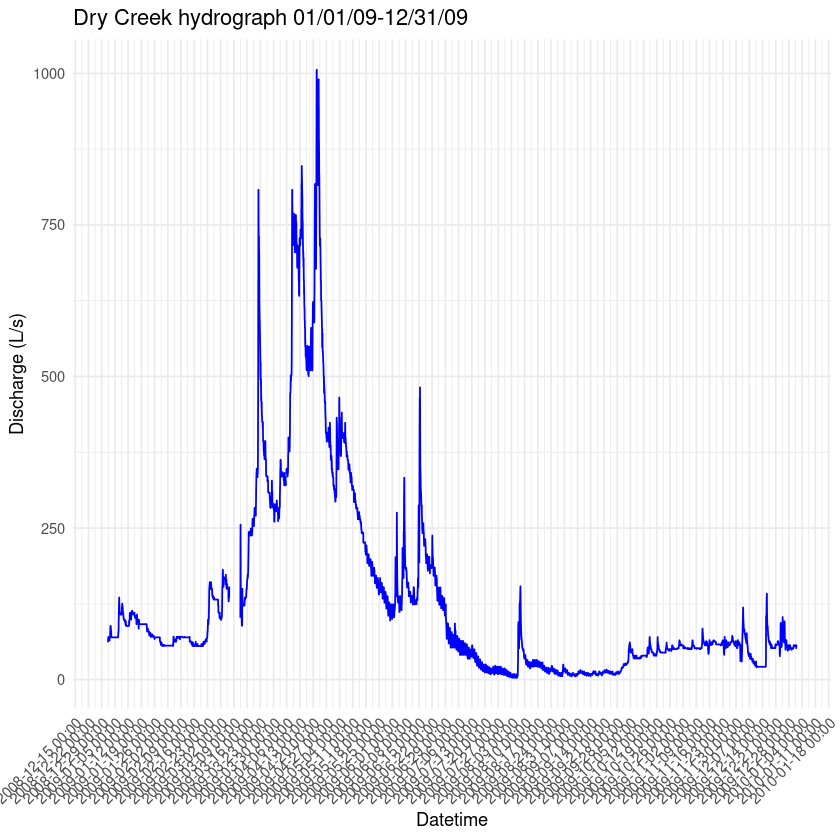

In [4]:
#######################
# PLOT THE HYDROGRAPH #
#######################

# Plot using ggplot2
hydrograph_plot <- ggplot(InputData1hr, aes(x = Datetime, y = Discharge_Ls)) +
  geom_line(color = "blue") +
  theme_minimal() +
  labs(title = "Dry Creek hydrograph 01/01/09-12/31/09",
       x = "Datetime",
       y = "Discharge (L/s)") +
  scale_x_datetime(date_labels = "%Y-%m-%d %H:%M", date_breaks = "1 week") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print the plot
print(hydrograph_plot)

####################
# SAVE THE PLOT #
####################

# Save the plot to a file
#ggsave(file.path(output_dir, "hydrograph_plot.png"), hydrograph_plot, width = 10, height = 6)

### Plot just the August storm event

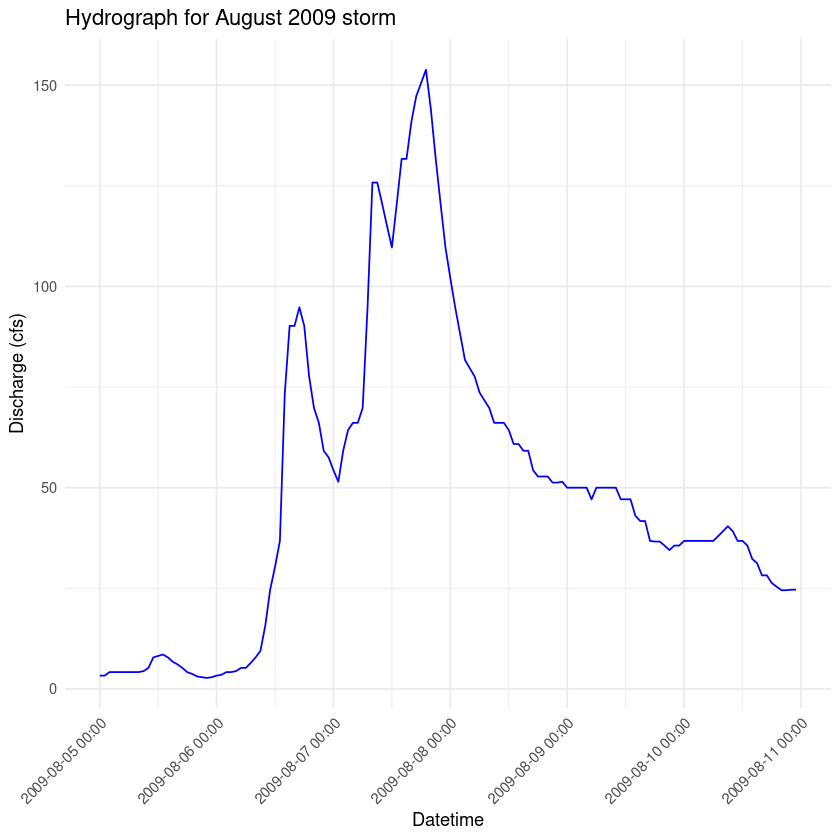

In [5]:
# Filter data for the August 2009 storm event
storm_start <- ymd_hms("2009-08-05 00:00:00")
storm_end <- ymd_hms("2009-08-11 00:00:00")
storm_data <- InputData1hr %>% filter(Datetime >= storm_start & Datetime < storm_end)

# Plot using ggplot2
hydrograph_plot <- ggplot(storm_data, aes(x = Datetime, y = Discharge_Ls)) +
  geom_line(color = "blue") +
  theme_minimal() +
  labs(title = "Hydrograph for August 2009 storm",
       x = "Datetime",
       y = "Discharge (cfs)") +
  scale_x_datetime(date_labels = "%Y-%m-%d %H:%M", date_breaks = "1 day") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print the plot
print(hydrograph_plot)

# New and old water separation


### The 2-member end member mixing model assumes that streamflow at any time is the sum of old water and new water:

### $Q_s(t) = Q_o(t) + Q_n(t) \tag{1}$

### where _Q_ is flow rate in the stream at a time (t), and the subscripts _s, n, and o_ refer to the total, new water, and old water components.

### If a naturally occurring conservative chemical tracer can be distinctly identified in old and new water, the mass flow rate of that tracer in streamflow at any time is sum of the mass flow rate in old water and new water. Because mass flow rate can be expressed as the product of water flow rate and the concentration, C, of the tracer in water, conservation of mass for the tracer can be written as:

### $Q_s(t)C_s(t) = Q_o(t)C_o(t) + Q_n(t)C_n(t) \tag{2}$

### Solving Eq 2 for $Q_n(t)$ and then substituting Eq 1 into Eq 2, the expression for $Q_o(t)$ can be obtained as:


### $Q_o(t) = Q_s(t) \cdot \frac{C_s(t) - C_n(t)}{C_o(t) - C_n(t)} \tag{3}$

### By integrating Eq 3 over the duration of an event flow hydrograph we can obtain the total volume of old water contributions to event flow, which can be divided by the total volume of event flow leading to the proportion of an event flow hydrograph the resulted from old water contributions.

***

### Manual measurements from grab samples of the precipitation at Dry Creek indicate that rainfall has an electric conductivity of 0.013 ± 0.004 mS/cm.

### Ideally, the groundwater would be directly sampled, but this data is unavailable at Dry Creek. Presumably, the EC in the stream prior to the storm represents an integrated measure of the EC of old water.

Total Volume (m^3):  25566.02 
Old Water Volume (m^3):  23141.54 
New Water Volume (m^3):  2424.484 


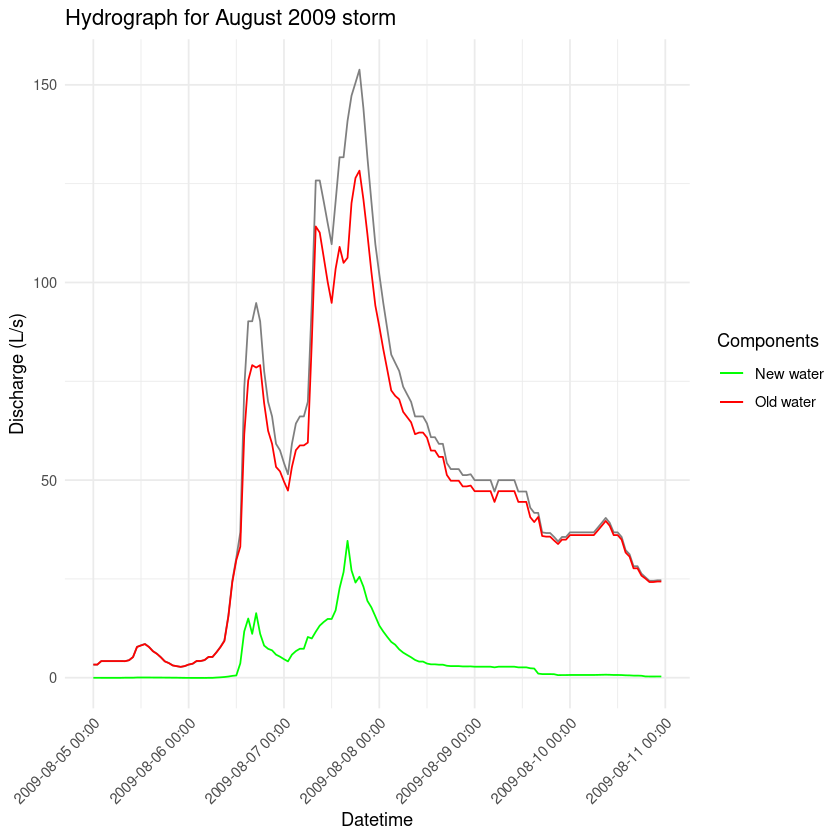

In [12]:
#################
# SET VARIABLES #
#################

# New water EC is from mean rainwater measurements (in mS/cm)
C_new = 0.013

# Old water EC is the streamflow EC pre-event (in mS/cm)
# Get average from the day prior to the event rising limb

# Filter data for the specified pre-event time range
pretime_range_start <- ymd_hms("2009-08-05 00:00:00")
pretime_range_end <- ymd_hms("2009-08-06 00:00:00")
subset_data <- storm_data %>% filter(Datetime >= pretime_range_start & Datetime < pretime_range_end)
C_old <- mean(subset_data$`StreamEC.mS.cm`, na.rm = TRUE)

##################
# CALC OLD & NEW #
##################

# Calculate Q_o(t) using Equation 3
storm_data <- storm_data %>%
  mutate(Q_o = `Discharge_Ls` * (`StreamEC.mS.cm` - C_new) / (C_old - C_new),
         Q_n = `Discharge_Ls` - Q_o)

##################
# PLOT DISCHARGE #
##################

# Plot using ggplot2
hydrograph_plot <- ggplot(storm_data, aes(x = Datetime)) +
  geom_line(aes(y = Discharge_Ls, color = "Total Discharge")) +
  geom_line(aes(y = Q_o, color = "Old water")) +
  geom_line(aes(y = Q_n, color = "New water")) +
  scale_color_manual(values = c("Total discharge" = "blue", "Old water" = "red", "New water" = "green")) +
  theme_minimal() +
  labs(title = "Hydrograph for August 2009 storm",
       x = "Datetime",
       y = "Discharge (L/s)",
       color = "Components") +
  scale_x_datetime(date_labels = "%Y-%m-%d %H:%M", date_breaks = "1 day") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print the plot
print(hydrograph_plot)

#########################
# INTEGRATE FOR VOLUMES #
#########################

# Calculate the time differences in seconds from the first datetime
storm_data <- storm_data %>%
  mutate(time_diff = as.numeric(difftime(Datetime, first(Datetime), units = "secs")))

# Integrate to find total volumes (using trapezoidal rule)
total_volume <- trapz(storm_data$time_diff[-1], storm_data$Discharge_Ls[-1])
old_water_volume <- trapz(storm_data$time_diff[-1], storm_data$Q_o[-1])
new_water_volume <- trapz(storm_data$time_diff[-1], storm_data$Q_n[-1])

# Convert volumes to cubic meters (since discharge is in L/s)
total_volume_m3 <- total_volume / 1000
old_water_volume_m3 <- old_water_volume / 1000
new_water_volume_m3 <- new_water_volume / 1000

cat("Total Volume (m^3): ", total_volume_m3, "\n")
cat("Old Water Volume (m^3): ", old_water_volume_m3, "\n")
cat("New Water Volume (m^3): ", new_water_volume_m3, "\n")


#######################
# SAVE DISCHARGE PLOT #
#######################

# Save the plot to a file
ggsave(file.path(output_dir, "august_2009_storm_hydrograph_components.png"), hydrograph_plot, width = 10, height = 6)

# ENTIRE SCRIPT

Total Volume (m^3):  25566.02 
Old Water Volume (m^3):  23141.54 
New Water Volume (m^3):  2424.484 


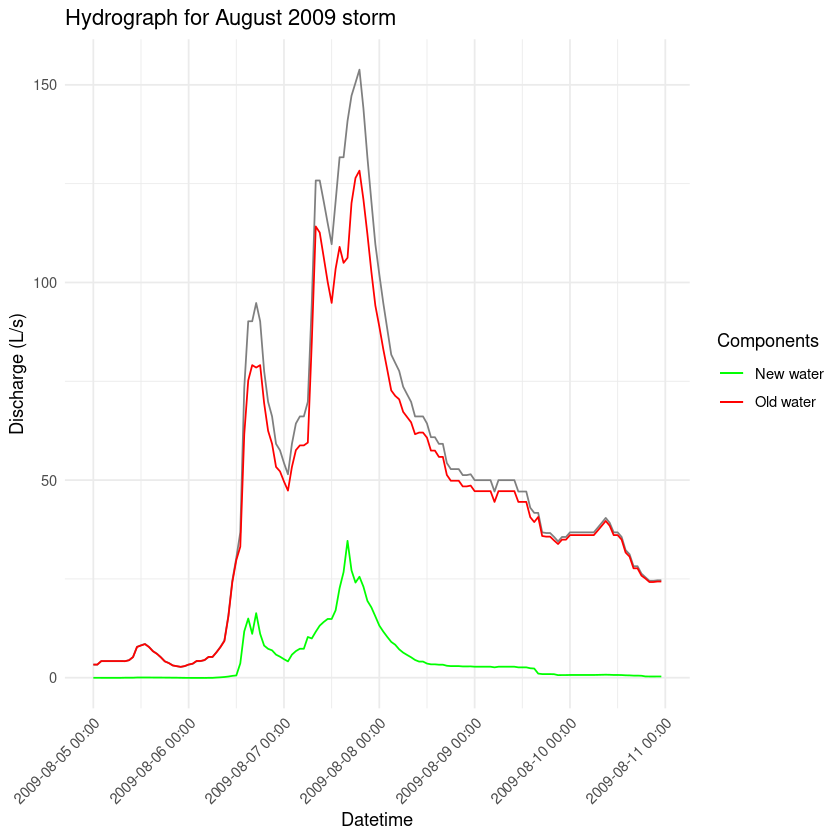

In [14]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)
library(caTools)  # for numerical integration

###################
# SET DIRECTORIES #
###################

input_dir <- "cond-hydrograph-separation/data"
output_dir <- "cond-hydrograph-separation/output/"

################
# READ IN DATA #
################

# Read in modified Q-EC data csv from Boise State Dry Creek downloaded from https://docs.google.com/spreadsheets/d/1yARb9zLlPqkGWxe0U5nPeaPEPHsFHBGJ/edit?pli=1#gid=1826023747

InputData1hr <- read.csv(file.path(input_dir,"/boise-state-ec/boise-stream-ec.csv"))

#####################
# CLEAN THE DATA  #
#####################

# Convert missing values to NA
InputData1hr[InputData1hr == ""] <- NA

# Convert Datetime column to proper datetime format
InputData1hr$Datetime <- mdy_hms(InputData1hr$Datetime)

#################
# SET VARIABLES #
#################

# New water EC is from mean rainwater measurements (in mS/cm)
C_new = 0.013

# Old water EC is the streamflow EC pre-event (in mS/cm)
# Get average from the day prior to the event rising limb

# Filter data for the specified pre-event time range
pretime_range_start <- ymd_hms("2009-08-05 00:00:00")
pretime_range_end <- ymd_hms("2009-08-06 00:00:00")
subset_data <- storm_data %>% filter(Datetime >= pretime_range_start & Datetime < pretime_range_end)
C_old <- mean(subset_data$`StreamEC.mS.cm`, na.rm = TRUE)

##################
# CALC OLD & NEW #
##################

# Calculate Q_o(t) using Equation 3
storm_data <- storm_data %>%
  mutate(Q_o = `Discharge_Ls` * (`StreamEC.mS.cm` - C_new) / (C_old - C_new),
         Q_n = `Discharge_Ls` - Q_o)

##################
# PLOT DISCHARGE #
##################

# Plot using ggplot2
hydrograph_plot <- ggplot(storm_data, aes(x = Datetime)) +
  geom_line(aes(y = Discharge_Ls, color = "Total Discharge")) +
  geom_line(aes(y = Q_o, color = "Old water")) +
  geom_line(aes(y = Q_n, color = "New water")) +
  scale_color_manual(values = c("Total discharge" = "blue", "Old water" = "red", "New water" = "green")) +
  theme_minimal() +
  labs(title = "Hydrograph for August 2009 storm",
       x = "Datetime",
       y = "Discharge (L/s)",
       color = "Components") +
  scale_x_datetime(date_labels = "%Y-%m-%d %H:%M", date_breaks = "1 day") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Print the plot
print(hydrograph_plot)

#########################
# INTEGRATE FOR VOLUMES #
#########################

# Calculate the time differences in seconds from the first datetime
storm_data <- storm_data %>%
  mutate(time_diff = as.numeric(difftime(Datetime, first(Datetime), units = "secs")))

# Integrate to find total volumes (using trapezoidal rule)
total_volume <- trapz(storm_data$time_diff[-1], storm_data$Discharge_Ls[-1])
old_water_volume <- trapz(storm_data$time_diff[-1], storm_data$Q_o[-1])
new_water_volume <- trapz(storm_data$time_diff[-1], storm_data$Q_n[-1])

# Convert volumes to cubic meters (since discharge is in L/s)
total_volume_m3 <- total_volume / 1000
old_water_volume_m3 <- old_water_volume / 1000
new_water_volume_m3 <- new_water_volume / 1000

cat("Total Volume (m^3): ", total_volume_m3, "\n")
cat("Old Water Volume (m^3): ", old_water_volume_m3, "\n")
cat("New Water Volume (m^3): ", new_water_volume_m3, "\n")


#######################
# SAVE DISCHARGE PLOT #
#######################

# Save the plot to a file
ggsave(file.path(output_dir, "august_2009_storm_hydrograph_components.png"), hydrograph_plot, width = 10, height = 6)